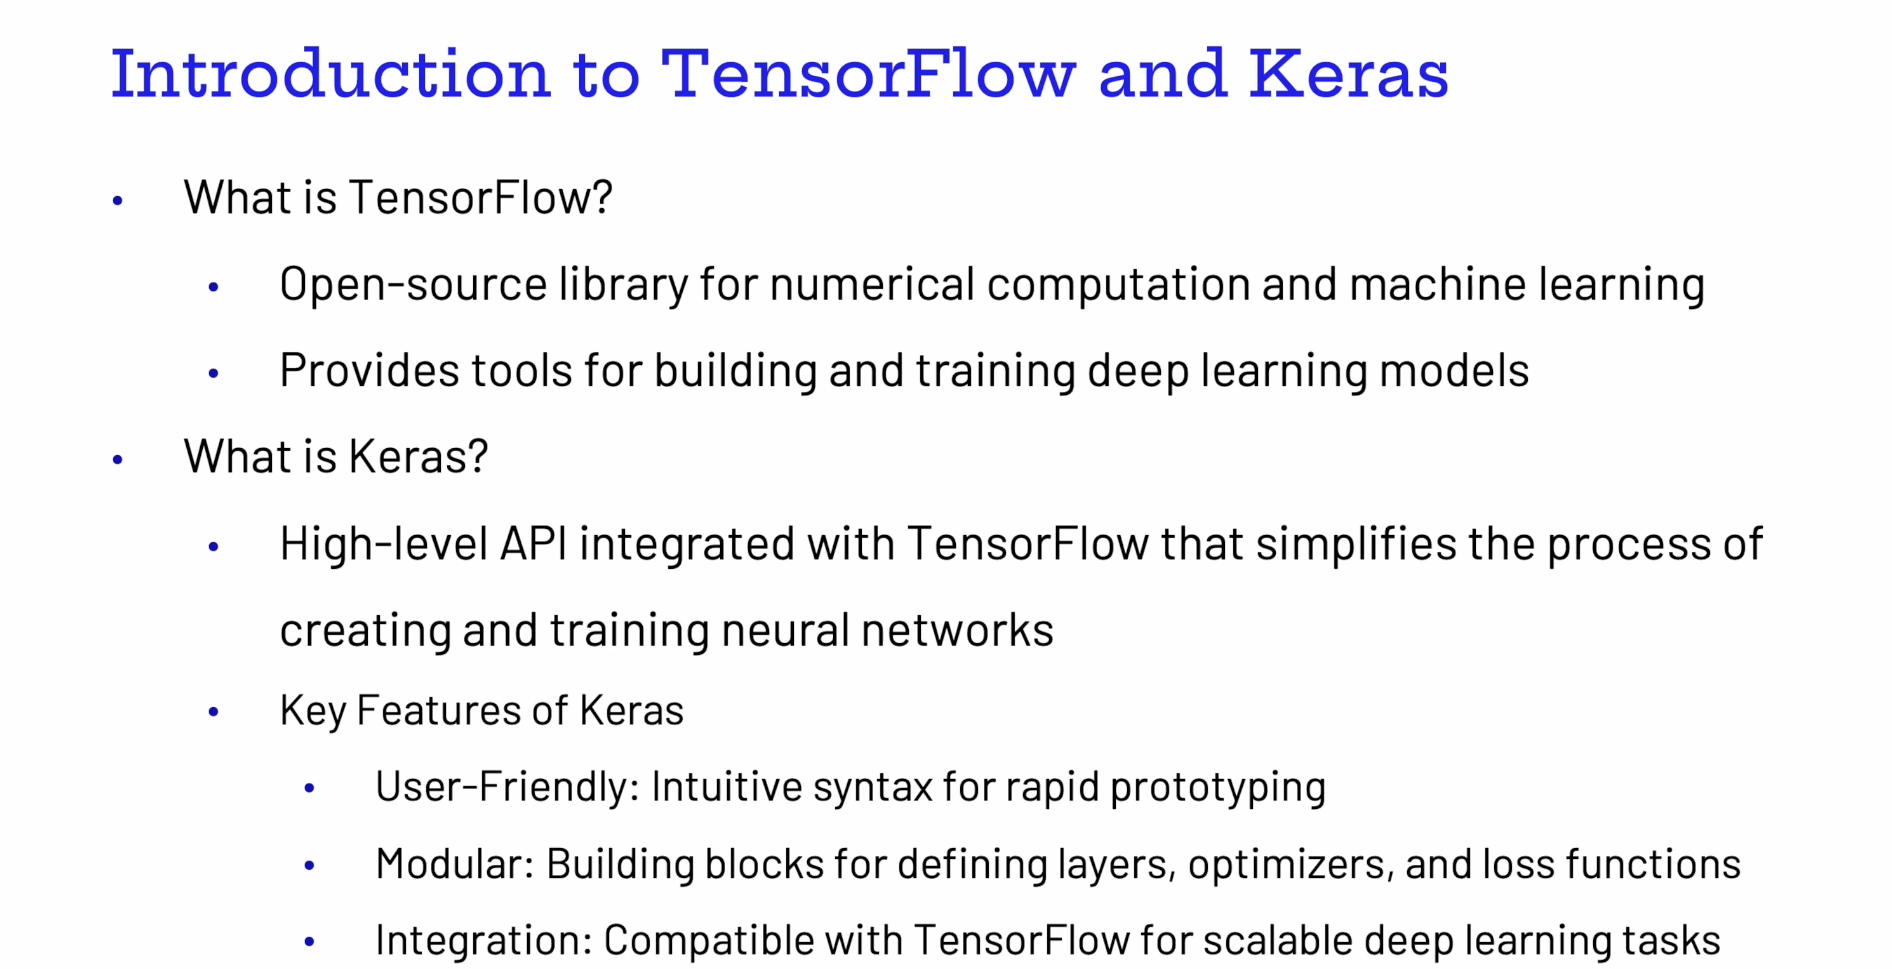
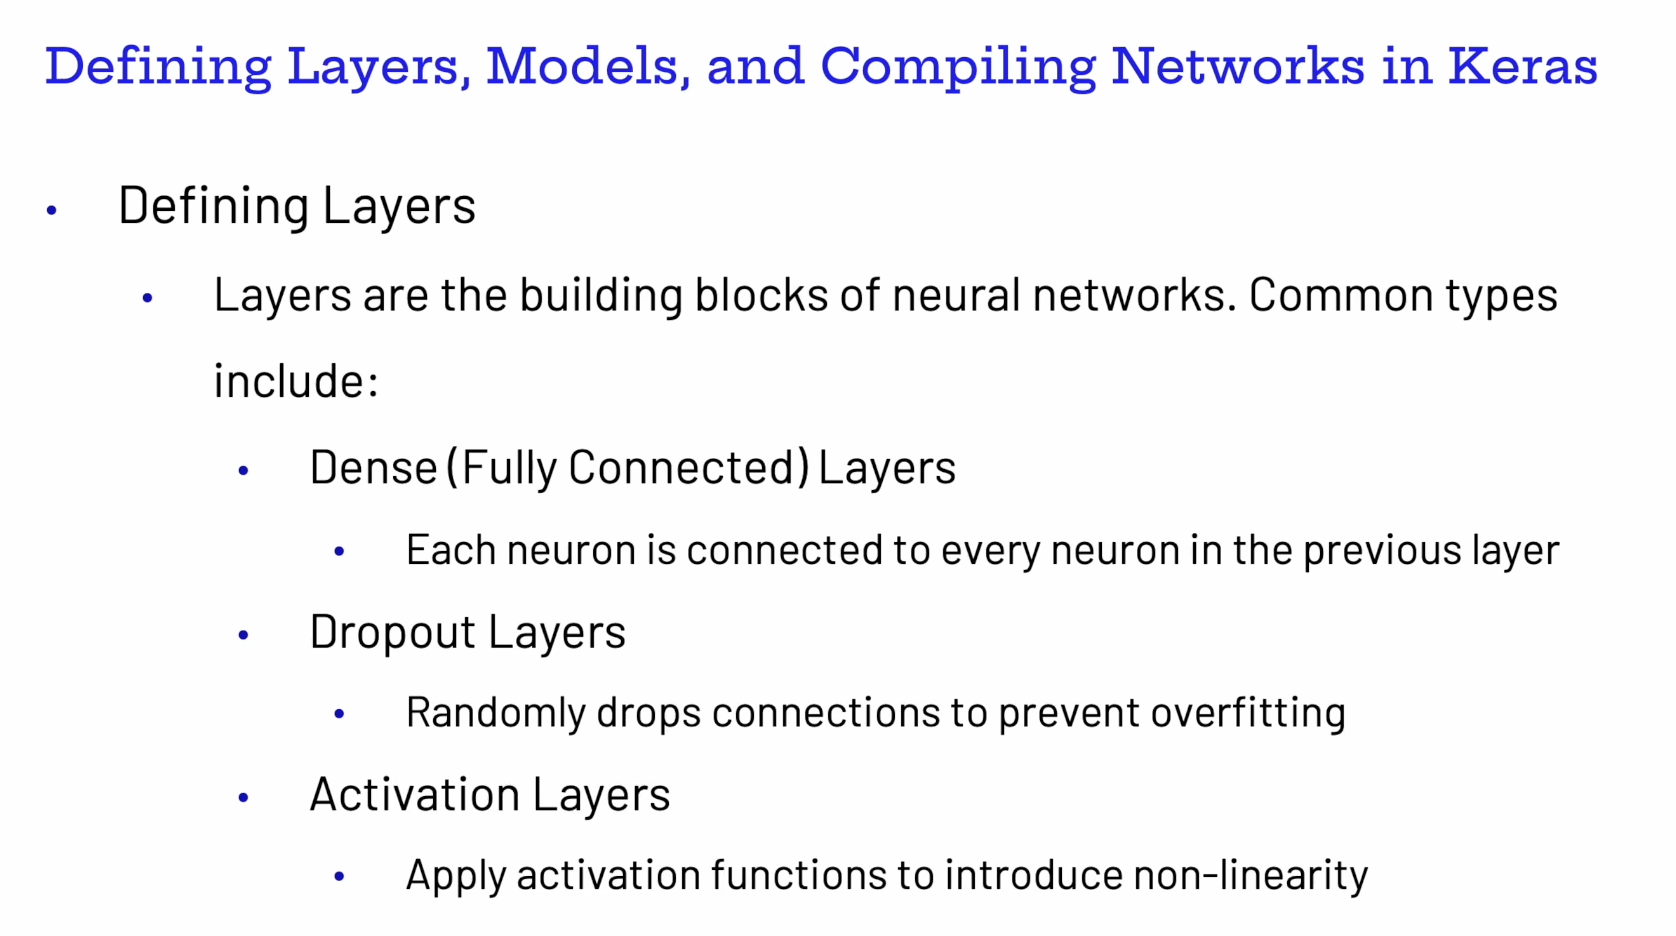
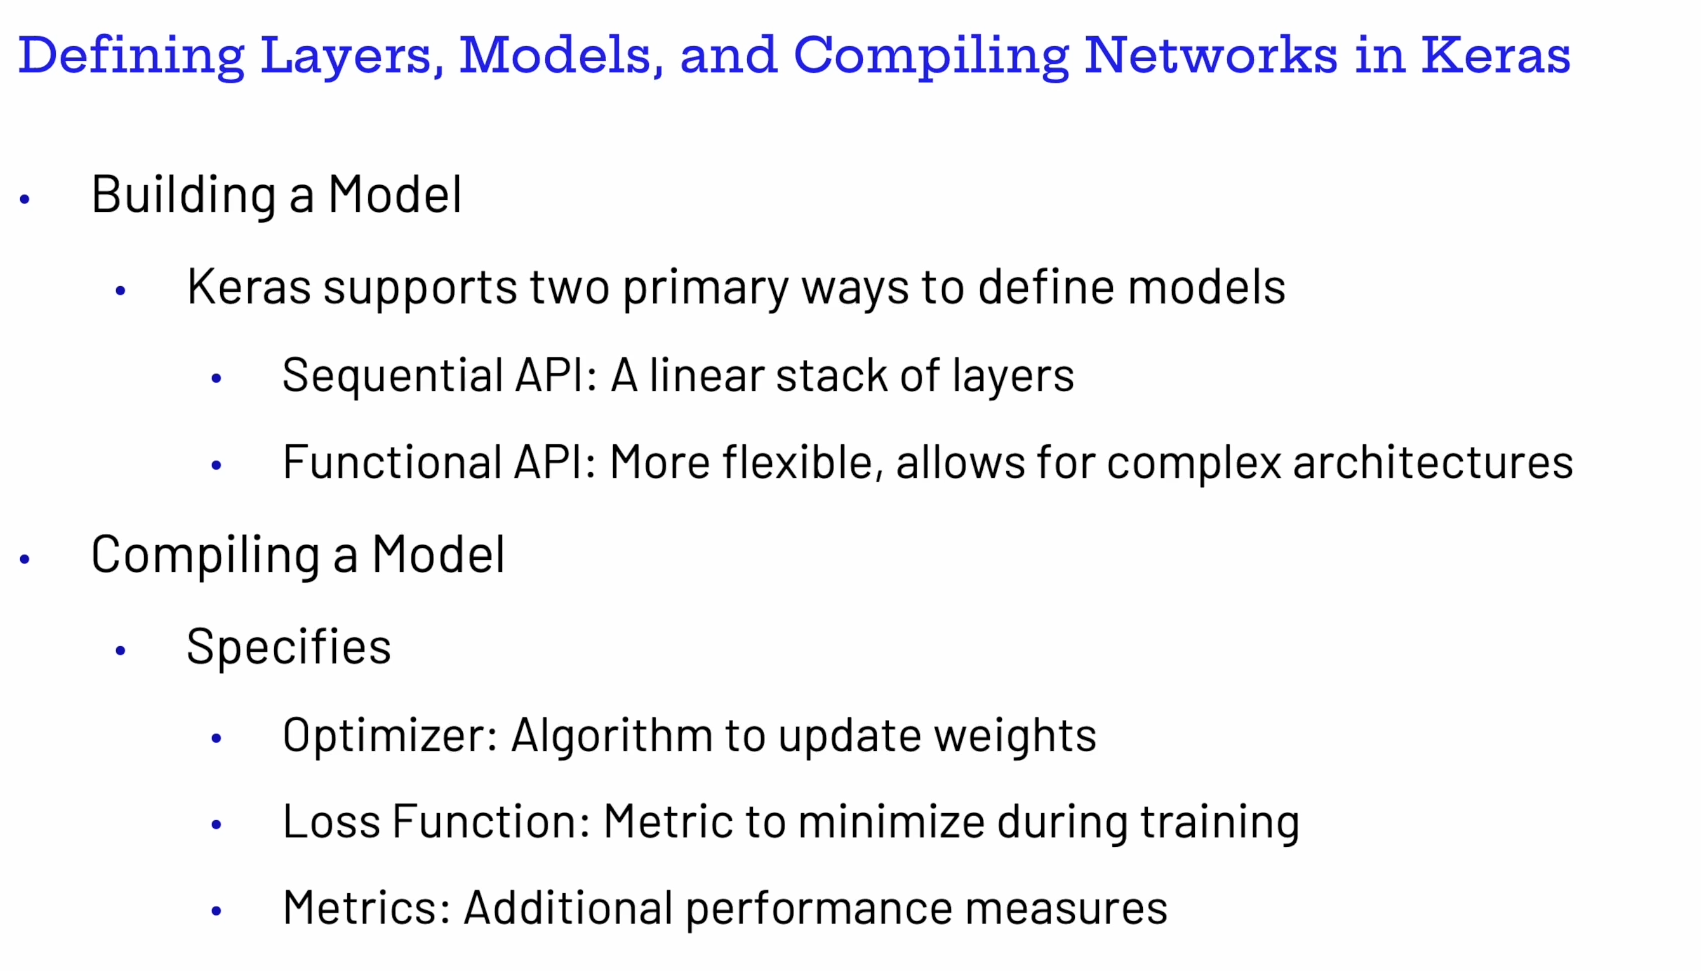
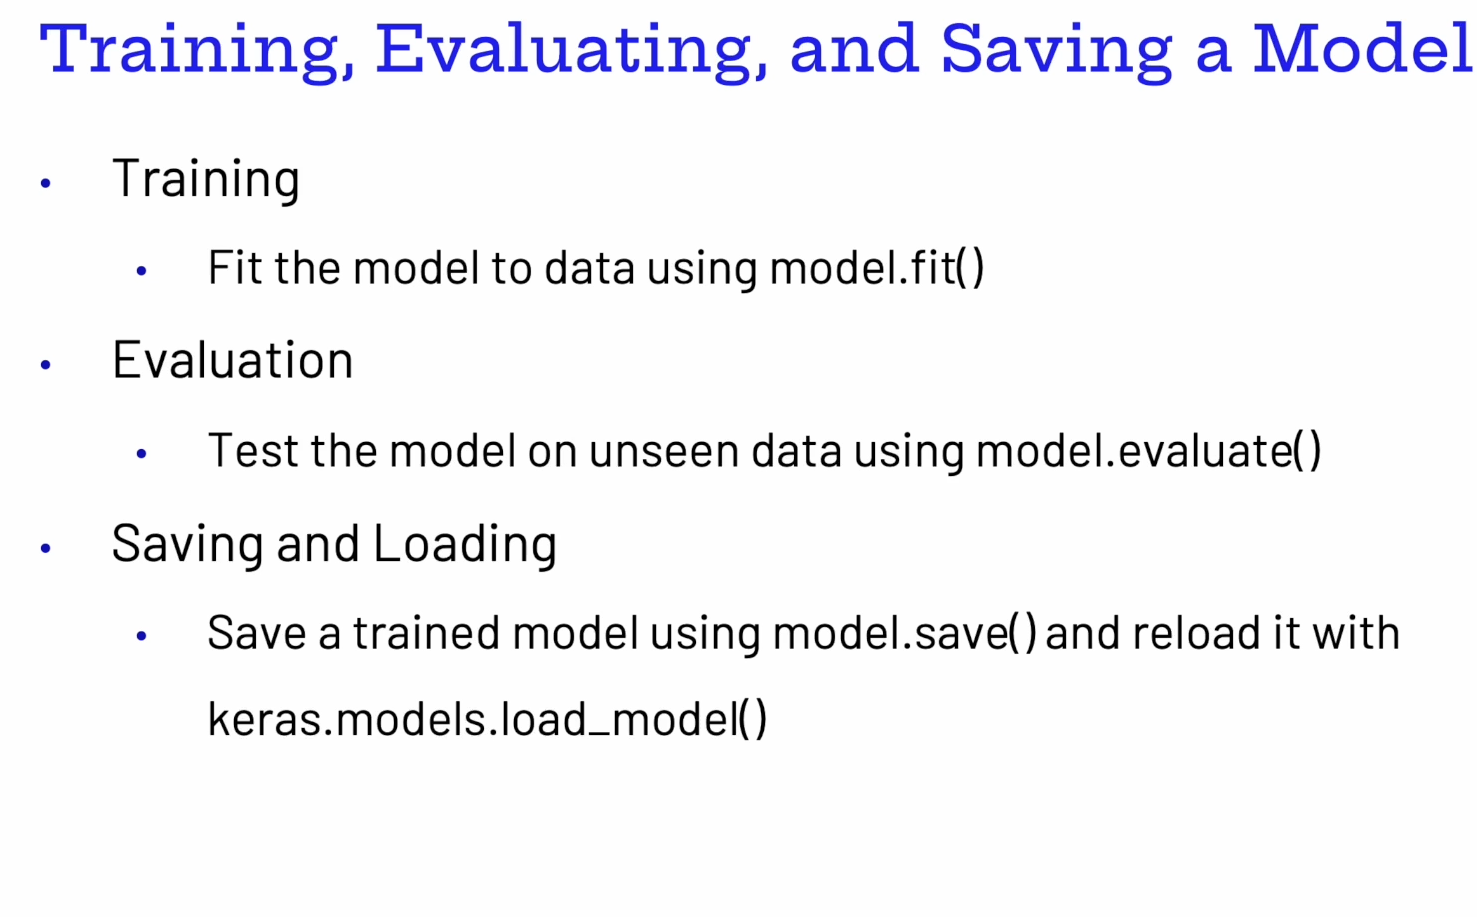



In [2]:
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical 

In [4]:
# load Mnist datasets
(x_train, y_train), (x_test, y_test ) = mnist.load_data()
# why we are doing these reshape steps? we are doing this because we want to add a channel dimension to the images and we converted to float32 because the pixel values are in the range of 0-255 and we want to normalize them to the range of 0-1.additionally we are normalizing the pixel values to be between 0 and 1 by dividing by 255.0)
x_train = x_train.reshape(-1,28,28,1).astype('float32') / 255.0
x_test = x_test.reshape(-1,28,28,1).astype('float32') / 255.0
 

In [6]:
# one hot encoding 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"x_train shape: {x_train.shape}")
print(f"test data :{x_test.shape}")

x_train shape: (60000, 28, 28, 1)
test data :(10000, 28, 28, 1)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [14]:
# building the model 
model = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape =(28,28,1)), # Conv2D layer with 32 filters and 3X3 matrix, kernal size of 3*3 and relu activation function 
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

e:\pythonAi\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# compile the model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model 
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

#evaluate the model 
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy : {test_acc:.4f}")


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9148 - loss: 0.2820 - val_accuracy: 0.9754 - val_loss: 0.0843
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9657 - loss: 0.1142 - val_accuracy: 0.9827 - val_loss: 0.0597
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9736 - loss: 0.0862 - val_accuracy: 0.9843 - val_loss: 0.0552
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9786 - loss: 0.0695 - val_accuracy: 0.9852 - val_loss: 0.0508
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9807 - loss: 0.0606 - val_accuracy: 0.9859 - val_loss: 0.0485
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9838 - loss: 0.0503 - val_accuracy: 0.9878 - val_loss: 0.0475
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9862 - loss: 0.0440 - val_accuracy: 0.9871 - val_loss: 0.0484
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9882 -